In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
subrun = 1049
#fileName = "./data/"+str(subrun)+".txt"
fileName = "./data/output_allCollimators.txt"

In [3]:
previousEntry = -1
colliCounter = 0
with open(fileName, "r") as ins:
    array = []
    for line in ins:
        if("Time(ns)" in line):
            ding = line.strip().split()
            #print(line)
            #print(ding)
            entry = int(ding[29])
            if(previousEntry < entry):
                colliCounter = 0
                previousEntry = entry
            dong = [float(ding[2]), float(ding[5]), float(ding[8]), float(ding[11]),
                    float(ding[14]), float(ding[17]) , float(ding[20]), float(ding[23]), 
                    float(ding[26]), entry, ding[32] ]
            if('olli' in ding[32]):
                collimator = int(ding[32].split('Collimator')[1])
                colliCounter += 1
            else:
                collimator = np.nan
            dong.append(collimator)
            dong.append(colliCounter)
            array.append(dong)

In [4]:
print(dong)

[3743.323496327126, 7326.39501953125, -3268.907603807334, 401.5215061678607, 6556.699388372584, -0.0, -0.0, -0.0, 0.0, 1000, 'RingYokeTop', nan, 2]


In [5]:
dffull = pandas.DataFrame(array, columns = [ 'time', 'R', 'x', 'y', 'z', 'px', 'py', 'pz', 'E', 
                                            'entry', 'Location', 'collimator', 'collimatorCollisions'])

In [6]:
entry = 12
df = dffull
#df = dffull.loc[dffull['Location'] == 'xtal[00]']
#df = dffull[dffull['Location'].str.contains('xtal')]
#df = dffull[dffull['entry'] == entry]
df = dffull[dffull['Location'].str.contains('olli')]
#df = dffull[dffull['Location'].str.contains('olli')].loc[dffull['collimatorCollisions'] > 1]
#df = dffull[dffull['Location'].str.contains('alori')]

In [7]:
df.head()

,time,R,x,y,z,px,py,pz,E,entry,Location,collimator,collimatorCollisions
92,74.618432,7062.713379,4.049337,-0.734426,-7062.712258,3089.461021,7.810150,1.942573,3089.471504,1,Collimator7,7.0,1
93,74.649663,7062.711914,13.406657,-0.710771,-7062.699251,3078.157980,17.662294,9.158184,3078.222275,1,Collimator7,7.0,2
501,74.649663,7062.703125,13.406518,-0.734455,-7062.690547,3079.412187,3.074171,22.550071,3079.496286,2,Collimator7,7.0,1
2939,74.649663,7062.703125,13.406512,-0.734455,-7062.690191,3080.875308,1.757211,5.331200,3080.880421,3,Collimator7,7.0,1
3044,86.955210,7065.404297,3534.234006,1.325753,-6117.934875,2668.513320,-5.123915,1536.010432,3079.012446,3,Collimator8,8.0,2


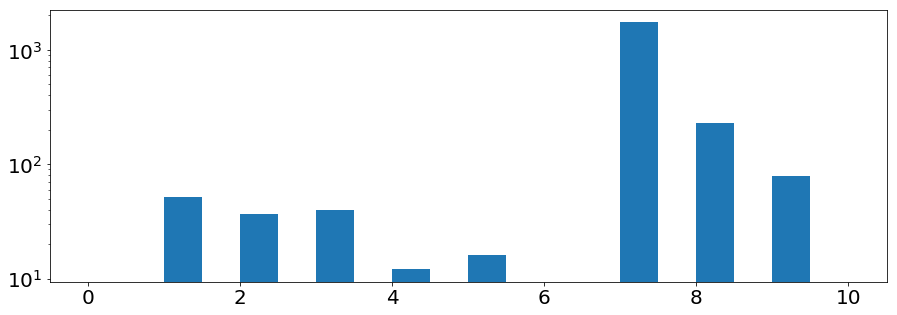

In [8]:
fig,ax = plt.subplots(figsize=(15,5))
plt.hist(df['collimator'], bins=20, range=(0,10))
plt.yscale("log")
plt.show()

In [9]:
collimatorLocations = [ [ i, [0.0,0.0,0.0] ] for i in range(15)]
#print(collimatorLocations)

[]

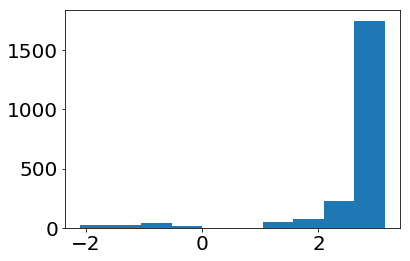

In [10]:
plt.hist( np.arctan2( df['x'] , df['z'] )  )
plt.plot()

In [11]:
for collimator in range(len(collimatorLocations)):
    dfi = df.loc[df['collimator'] == collimator]
    print(len(dfi))
    if(len(dfi) > 0):
        thetas = np.arctan2( dfi['x'] , dfi['z'] )
        #print(thetas)
        print( thetas.min(), thetas.idxmin() )
        print(thetas.loc[thetas.idxmin()])
        minColi = dfi.loc[thetas.idxmin()]
        collimatorLocations[collimator][1] = [ minColi['x'] , minColi['y'] , minColi['z'] ]
        print( np.arctan2( minColi['x'] , minColi['z'] ) )

0
52
1.5687261715341796 39508
1.5687261715341796
1.5687261715341796
37
-0.5255822985464069 85887
-0.5255822985464069
-0.5255822985464069
40
-1.0492129496693003 217315
-1.0492129496693003
-1.0492129496693003
12
-1.5727838683282611 1001689
-1.5727838683282611
-1.5727838683282611
16
-2.096341776293538 366969
-2.096341776293538
-2.096341776293538
0
1736
3.1396829277007456 1485861
3.1396829277007456
3.1396829277007456
228
2.616061931215641 1303846
2.616061931215641
2.616061931215641
79
2.092419322712409 845103
2.092419322712409
2.092419322712409
0
0
0
0
0


In [12]:
print(collimatorLocations)

[[0, [0.0, 0.0, 0.0]], [1, [7149.572147061633, -32.90936790610998, 14.80074553519848]], [2, [-3564.971430157989, -48.16327825427763, 6146.523638690166]], [3, [-6174.725806600468, -45.17248932919556, 3548.406158272934]], [4, [-7107.562234161643, 45.80357777122645, -14.12659374290179]], [5, [-6130.591655541465, 39.19554604806978, -3555.429017338756]], [6, [0.0, 0.0, 0.0]], [7, [13.49880163130026, 23.5769032584598, -7068.441234645938]], [8, [3551.629223122326, -37.0133435828963, -6124.247530783104]], [9, [6157.200107073624, -46.57608483479584, -3538.659238823555]], [10, [0.0, 0.0, 0.0]], [11, [0.0, 0.0, 0.0]], [12, [0.0, 0.0, 0.0]], [13, [0.0, 0.0, 0.0]], [14, [0.0, 0.0, 0.0]]]


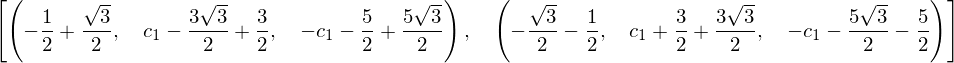

In [13]:
import sympy as sym
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

In [14]:
import numpy
collCoords = []
for collimator, coords in collimatorLocations:
    if (coords[0] == coords[1] == coords[2]):
        continue
    print('Starting:', collimator)
    initialTheta = np.arctan2( coords[0] , coords[2] )
    newTheta = initialTheta - 0.1
    radius = 7162
    print("    ", initialTheta, newTheta)
    
    xi,yi,zi = sym.symbols("x,y,z")
    f1 = sym.Eq( sym.atan2(xi, zi), newTheta )
    f2 = sym.Eq( xi**2 + zi**2, radius**2 )
    
    ding = sym.solve([f1,f2], (x,z))[0]
    print( "    ", ding, ding[0], ding[1])
    collCoords.append( (ding[0], ding[1]) )
    print( "    ", sym.atan2( ding[0] , ding[1] ) )

Starting: 1
     1.5687261715341796 1.4687261715341795
     (7124.72438756620, 729.757768865398) 7124.72438756620 729.757768865398
     1.46872617153418
Starting: 2
     -0.5255822985464069 -0.6255822985464069
     (-4193.84801676271, 5805.67677470038) -4193.84801676271 5805.67677470038
     -0.625582298546407
Starting: 3
     -1.0492129496693003 -1.1492129496693004
     (-6534.91073139400, 2930.73126245166) -6534.91073139400 2930.73126245166
     -1.14921294966930
Starting: 4
     -1.5727838683282611 -1.6727838683282612
     (-7124.78465126226, -729.169166337738) -7124.78465126226 -729.169166337738
     -pi + 1.46880878526153
Starting: 5
     -2.096341776293538 -2.196341776293538
     (-5805.83131006461, -4193.63408025468) -5805.83131006461 -4193.63408025468
     -pi + 0.945250877296253
Starting: 7
     3.1396829277007456 3.0396829277007456
     (728.614744422357, -7124.84137045944) 728.614744422357 -7124.84137045944
     -0.101909725889043 + pi
Starting: 8
     2.616061931215641 2.51

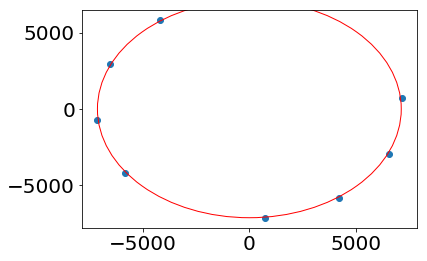

In [15]:
colx, coly = zip(*collCoords)
fig, ax = plt.subplots()
circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)
plt.scatter(colx, coly)
plt.show()

In [16]:
collCoords[0]

In [40]:
def rotate2D( inputVector, angle = 90 ):
    rotMatrix = np.array( [[np.cos(angle), -1*np.sin(angle)], [np.sin(angle), np.cos(angle)]] )
    inputVector = np.array([ float(inputVector[0]), float(inputVector[1]) ])
    #print(rotMatrix, inputVector)
    #print(type(rotMatrix), type(inputVector))
    outputVector = np.matmul(rotMatrix,inputVector)
    print(outputVector)
    
    return outputVector

In [28]:
def getAngleDiff( coord1, coord2 ):
    angle1 = np.arctan2( coord1[0], coord1[1] )
    angle2 = np.arctan2( coord2[0], coord2[1] )
    angleDiff = angle1 - angle2
    print(angle1, angle2, angleDiff)
    return angleDiff

In [29]:
inputVector = [-1,0]
ding = rotate2D( inputVector, r.TMath.Pi()/2)

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]] [-1.  0.]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[-6.123234e-17 -1.000000e+00]


In [30]:
getAngleDiff(inputVector, ding)

-1.5707963267948966 -3.141592653589793 1.5707963267948966


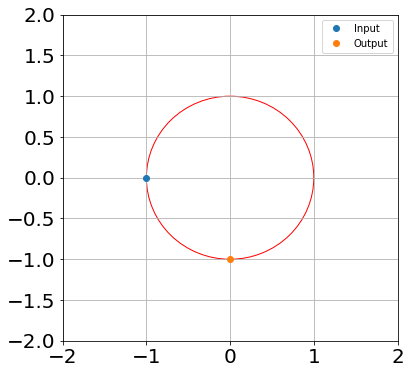

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
circle2 = plt.Circle((0,0), 1, color='r', fill=False)
ax.add_artist(circle2)

plt.plot(inputVector[0], inputVector[1],"o",label='Input')
plt.plot(ding[0], ding[1],"o",label='Output')
#plt.xlim(-7400,7400)
#plt.ylim(-7400,7400)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.grid()
plt.legend()
plt.show()

In [20]:
a = np.array([[1, 0],
              [0, 1]])
b = np.array([1, 2])

angle = 90
inputVector = collCoords[0]
a = np.array( [[np.cos(angle), -1*np.sin(angle)], [np.sin(angle), np.cos(angle)]] )
b = np.array([ float(inputVector[0]), float(inputVector[1]) ])
print(type(b))


print(a,b)
print( np.matmul(a, b) )

print( np.matmul(b, a) )

<class 'numpy.ndarray'>
[[-0.44807362 -0.89399666]
 [ 0.89399666 -0.44807362]] [7124.72438757  729.75776887]
[-3844.80203086  6042.49462916]
[-2540.00000966 -6696.46503395]


In [31]:
print(collCoords)

[(7124.72438756620, 729.757768865398), (-4193.84801676271, 5805.67677470038), (-6534.91073139400, 2930.73126245166), (-7124.78465126226, -729.169166337738), (-5805.83131006461, -4193.63408025468), (728.614744422357, -7124.84137045944), (4193.54857659943, -5805.89306960616), (6534.79461423322, -2930.99016541995)]


In [44]:
for x in collCoords:
    anglei = np.arctan2(float(x[0]), float(x[1]))
    print(anglei)
    

1.46872617153418
-0.625582298546407
-1.1492129496693
-1.67278386832826
-2.19634177629354
3.03968292770075
2.51606193121564
1.99241932271241


In [42]:
initialVector = [0, 7162]
directions = []
for x in collCoords:
    anglei = getAngleDiff( initialVector, [float(x[0]), float(x[1])] )
    ding = rotate2D( inputVector, anglei )
    directions.append( [ding[0], 0, ding[1]] )

0.0 1.46872617153418 -1.46872617153418
[-0.10189301  0.99479536]
0.0 -0.625582298546407 0.625582298546407
[-0.81062228 -0.5855694 ]
0.0 -1.1492129496693 1.1492129496693
[-0.40920571 -0.91244216]
0.0 -1.67278386832826 1.67278386832826
[ 0.10181083 -0.99480378]
0.0 -2.19634177629354 2.19634177629354
[ 0.58553953 -0.81064386]
0.0 3.03968292770075 -3.03968292770075
[0.9948117  0.10173342]
0.0 2.51606193121564 -2.51606193121564
[0.81065248 0.58552759]
0.0 1.99241932271241 -1.99241932271241
[0.40924185 0.91242594]


In [48]:
for loc, x in zip(collCoords, directions):
    print([loc[0], 0, loc[1]])
    print(x)
    print()

[7124.72438756620, 0, 729.757768865398]
[-0.10189301436266383, 0, 0.9947953626872664]

[-4193.84801676271, 0, 5805.67677470038]
[-0.8106222807456555, 0, -0.5855693963645229]

[-6534.91073139400, 0, 2930.73126245166]
[-0.40920570545261953, 0, -0.9124421574132927]

[-7124.78465126226, 0, -729.169166337738]
[0.10181083026218071, 0, -0.9948037770542115]

[-5805.83131006461, 0, -4193.63408025468]
[0.5855395253078298, 0, -0.8106438578699534]

[728.614744422357, 0, -7124.84137045944]
[0.9948116965176542, 0, 0.1017334186571289]

[4193.54857659943, 0, -5805.89306960616]
[0.8106524810955266, 0, 0.5855275867913201]

[6534.79461423322, 0, -2930.99016541995]
[0.40924185498742616, 0, 0.9124259444614946]

